***Librerias***

In [7]:
import faker as fk
import random as rd
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Planteamiento


Vamos a inventarnos mediante la biblioteca faker mil datos para introducir en nuestro dataset.Este contendrá las siguientes columnas

•	L:longitud

•	T:tiempo de caida

•	G:gravedad

Esta será la formula 2L/(T^2) que emplearemos para calcular cada valor de la gravedad.Además añadiremos tambien ,tres columnas que nos indicaran los tres planetas más probabables en los que nos podemos encontrar en función de la gravedad de cada dato.Y por último una columna con el error que hemos cometido en cada medición de la gravedad

Posteriormente , comprobraremos el resultado que obtenemos en el archivo de regresión lineal


*gravedades*

In [11]:
planetas_gravedad = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

con los experimentos que hemos llevado acabo obtenemos los siguientes resultados....

In [12]:
#Experimento a
l1=1.00
t1=0.46
g1=round(2*(l1)/(t1**2),2)
print("La gravedad en el primer caso es ",g1)

La gravedad en el primer caso es  9.45


In [13]:
#Experimento b
l2=2.00
t2=0.66
g2=round(2*(l2)/(t2**2),2)
print("La gravedad en el segundo  caso es ",g2)

La gravedad en el segundo  caso es  9.18


Sin embargo sabemos que estos cálculos no son precisos porque instrumento de 10 mm para la cinta milimetrada y de 10 milésimas de segundo para el cronómetro.Para calcular los errores de las mediciones tendremos que calcular el error absoluto y relativo para cada medición.Luego mediante la siguiente fórmula calcular error que hemos cometido en el cálculo de la gravedad.
Δg = |dg/dL * ΔL| + |dg/dt * Δt|

Donde:
dg/dL = Derivada parcial de g respecto a L = 2 / t^2
dg/dt = Derivada parcial de g respecto a t = -4L / t^3

In [14]:
#función para calcular el error cometido al calcular de la gravedad
def calcular_error_gravedad(l, t, delta_l, delta_t):
    dg_dL = 2 / (t**2)
    dg_dt = (-4 * l) / (t**3)
    
    error_gravedad = abs(dg_dL * delta_l) + abs(dg_dt * delta_t)
    return error_gravedad

In [15]:
# Experimento A
l1 = 1.00
t1 = 0.46
delta_l = 0.01
delta_t = 0.010
error_gravedad_1 = calcular_error_gravedad(l1, t1, delta_l, delta_t)

# Experimento B
l2 = 2.00
t2 = 0.66
error_gravedad_2 = calcular_error_gravedad(l2, t2, delta_l, delta_t)

print("El error  en la gravedad para el experimento A es ",error_gravedad_1)
print("El error  en la gravedad para el experimento B es ",error_gravedad_2)

El error  en la gravedad para el experimento A es  0.5054656036820908
El error  en la gravedad para el experimento B es  0.32417842335197705


ahora con estos datos que tenemos vamos a inventarnos a traves de la biblioteca faker otros mil más que añadiremos posteriormente al csv

In [16]:
def planetas_mas_probables(gravedad, planetas_gravedad, n=3):
    diferencias = {planeta: abs(gravedad - gravedad_planeta) for planeta, gravedad_planeta in planetas_gravedad.items()}
    planetas_ordenados = sorted(diferencias.items(), key=lambda x: x[1])
    return [planeta for planeta, diferencia in planetas_ordenados[:n]]

experimentos = [
    {"L": 1.00, "T": 0.46, "G": 9.45, "Error": 0.505},
    {"L": 2.00, "T": 0.66, "G": 9.18, "Error": 0.324}
]


for experimento in experimentos:
    planetas_probables = planetas_mas_probables(experimento["G"], planetas_gravedad)
    for i, planeta in enumerate(planetas_probables, 1):
        experimento[f"{i}º Planeta + Probable"] = planeta


df = pd.DataFrame(experimentos)

df

,L,T,G,Error,1º Planeta + Probable,2º Planeta + Probable,3º Planeta + Probable
0,1.0,0.46,9.45,0.505,Tierra,Saturno,Urano
1,2.0,0.66,9.18,0.324,Saturno,Urano,Tierra


# Creación Data Set

In [17]:
import faker as fk

In [18]:
fake = fk.Faker()

def calcular_error_gravedad(l, t, delta_l, delta_t):
    dg_dL = 2 / (t**2)
    dg_dt = (-4 * l) / (t**3)
    
    error_gravedad = abs(dg_dL * delta_l) + abs(dg_dt * delta_t)
    return error_gravedad

def generar_datos(planetas, L_final, t_final):
    L = round(rd.uniform(L_final - 0.1, L_final + 0.1), 2)
    t = round(rd.uniform(t_final - 0.1, t_final + 0.1), 2)
    gravedad = round((2 * L) / (t**2), 2)

    planetas_cercanos = planetas_mas_probables(gravedad, planetas, n=3)

    error_gravedad = calcular_error_gravedad(L, t, 0.01, 0.010)

    return {
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': gravedad,
        'Error Gravedad (m/s^2)': error_gravedad,
        '1º Planeta + Probable': planetas_cercanos[0],
        '2º Planeta + Probable': planetas_cercanos[1],
        '3º Planeta + Probable': planetas_cercanos[2]
    }

L1 = 1.00
t1 = 0.46

df_experimentos= pd.DataFrame([generar_datos(planetas_gravedad, L1, t1) for _ in range(1000)])

df_experimentos

,Longitud (m),Tiempo (s),Gravedad (m/s^2),Error Gravedad (m/s^2),1º Planeta + Probable,2º Planeta + Probable,3º Planeta + Probable
0,1.05,0.44,10.85,0.596356,Neptuno,Tierra,Saturno
1,1.03,0.48,8.94,0.459346,Saturno,Urano,Tierra
2,0.95,0.40,11.87,0.718750,Neptuno,Tierra,Saturno
3,1.03,0.55,6.81,0.313749,Urano,Saturno,Tierra
4,0.94,0.50,7.52,0.380800,Urano,Saturno,Tierra
...,...,...,...,...,...,...,...
995,0.94,0.43,10.17,0.581081,Tierra,Neptuno,Saturno
996,0.99,0.37,14.46,0.927882,Neptuno,Tierra,Saturno
997,1.00,0.48,8.68,0.448495,Urano,Saturno,Tierra
998,1.00,0.42,11.34,0.653277,Neptuno,Tierra,Saturno


# Tratamiento datos

In [24]:
df_experimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitud (m)            1000 non-null   float64
 1   Tiempo (s)              1000 non-null   float64
 2   Gravedad (m/s^2)        1000 non-null   float64
 3   Error Gravedad (m/s^2)  1000 non-null   float64
 4   1º Planeta + Probable   1000 non-null   object 
 5   2º Planeta + Probable   1000 non-null   object 
 6   3º Planeta + Probable   1000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


Como podemos comprobar hay tres variables que son de tipo objet que nos indican los planetas donde es más probable que estén los astronautas

In [56]:
#comprobamos que no hay ningún valor nulo
df_experimentos.isna().sum() 

Longitud (m)              0
Tiempo (s)                0
Gravedad (m/s^2)          0
Error Gravedad (m/s^2)    0
1º Planeta + Probable     0
2º Planeta + Probable     0
3º Planeta + Probable     0
dtype: int64

# Análisis Datos

In [29]:
#información básica de cada columna 
df_experimentos.describe()

,Longitud (m),Tiempo (s),Gravedad (m/s^2),Error Gravedad (m/s^2)
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.99922,0.461050,9.882400,0.549897
std,0.05753,0.059118,2.639743,0.205555
min,0.90000,0.360000,5.740000,0.268768
25%,0.95000,0.410000,7.620000,0.374400
50%,1.00000,0.460000,9.400000,0.498926
75%,1.05000,0.510000,11.870000,0.700000
max,1.10000,0.560000,16.510000,1.071674


***Conclusiones obtenidas***
Podemos concluir que lo más probable es que los astronautas se encuentren en la ***tierra*** , ya que la media de los datos que hemos obtenido es 9.88 valor muy próximo a la gravedad en la tierra.Además el margen de error medio es 0.54
Por lo tanto ,el valor de la gravedad puede oscilar entre 9.88+/-0.54.Por ello ,aunque lo más probable es que se ecuentren la tierra no deberíamos descartar la opción de que estuviesen en saturno


In [82]:
# consultamos los datos que son de tipo objet
df_experimentos.dtypes[df_experimentos.dtypes=='object']

Series([], dtype: object)

Utilizamos la biblioteca sklearn y creamos una nueva version del dataset llamada df_numérico ,donde las columnas de los planetas + probables serán transformadas en números

In [23]:
df_experimentos = df_experimentos.rename(columns={'Planeta 1': '1º Planeta + Probable', 'Planeta 2': '2º Planeta + Probable', 'Planeta 3': '3º Planeta + Probable'})
from sklearn.preprocessing import LabelEncoder                                                     
df_experimentos_filt = df_experimentos.copy()

encoder = LabelEncoder()
# Transformamos las columnas de los planetas más probables en números
for columna in ['1º Planeta + Probable', '2º Planeta + Probable', '3º Planeta + Probable']:
    df_experimentos_filt[columna] = encoder.fit_transform(df_experimentos_filt[columna])

df_experimentos_filt

,Longitud (m),Tiempo (s),Gravedad (m/s^2),Error Gravedad (m/s^2),1º Planeta + Probable,2º Planeta + Probable,3º Planeta + Probable
0,1.05,0.44,10.85,0.596356,1,3,2
1,1.03,0.48,8.94,0.459346,2,4,3
2,0.95,0.40,11.87,0.718750,1,3,2
3,1.03,0.55,6.81,0.313749,4,2,3
4,0.94,0.50,7.52,0.380800,4,2,3
...,...,...,...,...,...,...,...
995,0.94,0.43,10.17,0.581081,3,1,2
996,0.99,0.37,14.46,0.927882,1,3,2
997,1.00,0.48,8.68,0.448495,4,2,3
998,1.00,0.42,11.34,0.653277,1,3,2


In [26]:
columnas_planetas = ['1º Planeta + Probable', '2º Planeta + Probable', '3º Planeta + Probable']
columnas_planetas = ['1º Planeta + Probable', '2º Planeta + Probable', '3º Planeta + Probable']

for columna in columnas_planetas:
    contar_planetas = df_experimentos[columna].value_counts()
    print(f" '{columna}':")
    print(contar_planetas)
    print("\n")

 '1º Planeta + Probable':
Urano      422
Neptuno    370
Tierra     130
Saturno     60
Marte       18
Name: 1º Planeta + Probable, dtype: int64


 '2º Planeta + Probable':
Saturno    493
Tierra     389
Urano       59
Neptuno     41
Marte       18
Name: 2º Planeta + Probable, dtype: int64


 '3º Planeta + Probable':
Saturno    447
Tierra     382
Urano       92
Marte       63
Neptuno     16
Name: 3º Planeta + Probable, dtype: int64




# Importancia de las variables

In [110]:
target="1º Planeta + Probable"
features = [x for x in df_experimentos_filt.columns if x!=target]

print(target)
print(features)

1º Planeta + Probable
['Longitud (m)', 'Tiempo (s)', 'Gravedad (m/s^2)', 'Error Gravedad (m/s^2)', '2º Planeta + Probable', '3º Planeta + Probable']


In [111]:
df_experimentos_filt[target]

0      4
1      1
2      2
3      4
4      1
      ..
995    0
996    4
997    1
998    1
999    3
Name: 1º Planeta + Probable, Length: 1000, dtype: int64

In [113]:
from sklearn.tree import DecisionTreeRegressor


arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)


arbol_importancia.fit(X=df_experimentos_filt[features], y=df_experimentos[target])

DecisionTreeRegressor(max_depth=16, random_state=100)

In [114]:
y_pred_arbol = arbol_importancia.predict(X=df_experimentos_filt[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Mean Absolute Error:', mean_absolute_error(df_experimentos_filt[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_experimentos[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_experimentos_filt[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_experimentos_filt[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_experimentos_filt[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


Como podemos ver hemos hecho todos los cálculos de manera correcta , por lo que nuestros modelo es fiable

In [115]:
arbol_importancia.feature_importances_

array([0.        , 0.        , 0.04691892, 0.00960748, 0.91609337,
       0.02738022])

Reprentamos la ***dispersión de los datos ***obtenidos

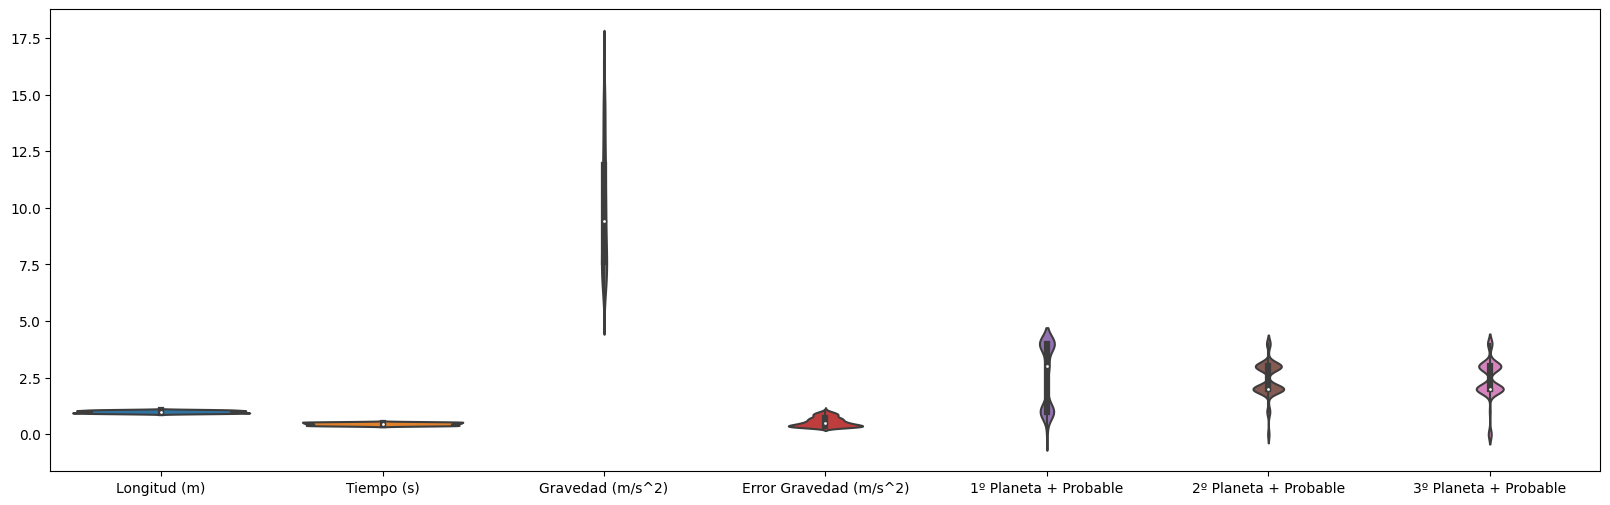

In [117]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df_experimentos_filt, orient='v')
plt.show()

# **Preparación datos**

In [158]:
X = df_experimentos_filt[['Longitud (m)', 'Tiempo (s)']]
y = 2 * X['Longitud (m)'] / X['Tiempo (s)']**2


In [159]:
from sklearn.preprocessing import StandardScaler


escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[-1.37770963,  1.3361416 ],
       [ 0.01356493, -1.54092074],
       [ 0.53529289,  0.32070783],
       ...,
       [ 1.40483948, -0.69472594],
       [-0.85598167, -1.03320386],
       [ 0.01356493, -0.35624801]])

In [160]:
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,Longitud (m),Tiempo (s)
0,-1.377710,1.336142
1,0.013565,-1.540921
2,0.535293,0.320708
3,-0.334254,0.997664
4,1.752658,-0.863965
...,...,...
995,-0.855982,1.674620
996,-1.551619,-0.017770
997,1.404839,-0.694726
998,-0.855982,-1.033204


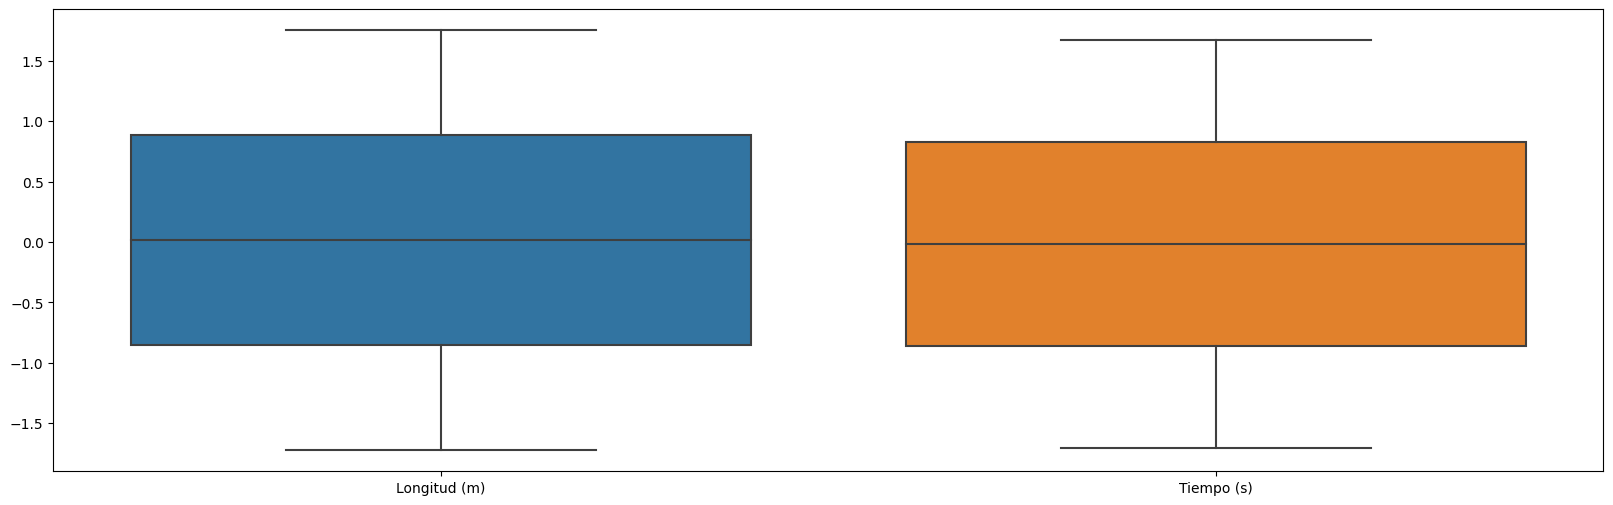

In [162]:
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

## **Training y test**

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)
#vemos como se separa en las dos partes
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

800
200


1000

# **Modelo Regresión**

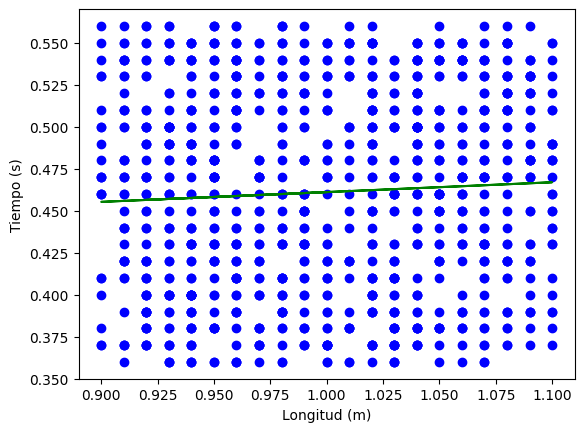

In [200]:
    X = df_experimentos_filt['Longitud (m)'].values.reshape(-1, 1)
    Y = df_experimentos_filt['Tiempo (s)'].values.reshape(-1, 1)

    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X, y)

    y_pred = regresion_lineal.predict(X)
    plt.scatter(X, y, color='blue') 
    plt.plot(X, y_pred, color='green')
    plt.xlabel('Longitud (m)')
    plt.ylabel('Tiempo (s)')
    plt.show()

# **Todos los gráficos de las variables**

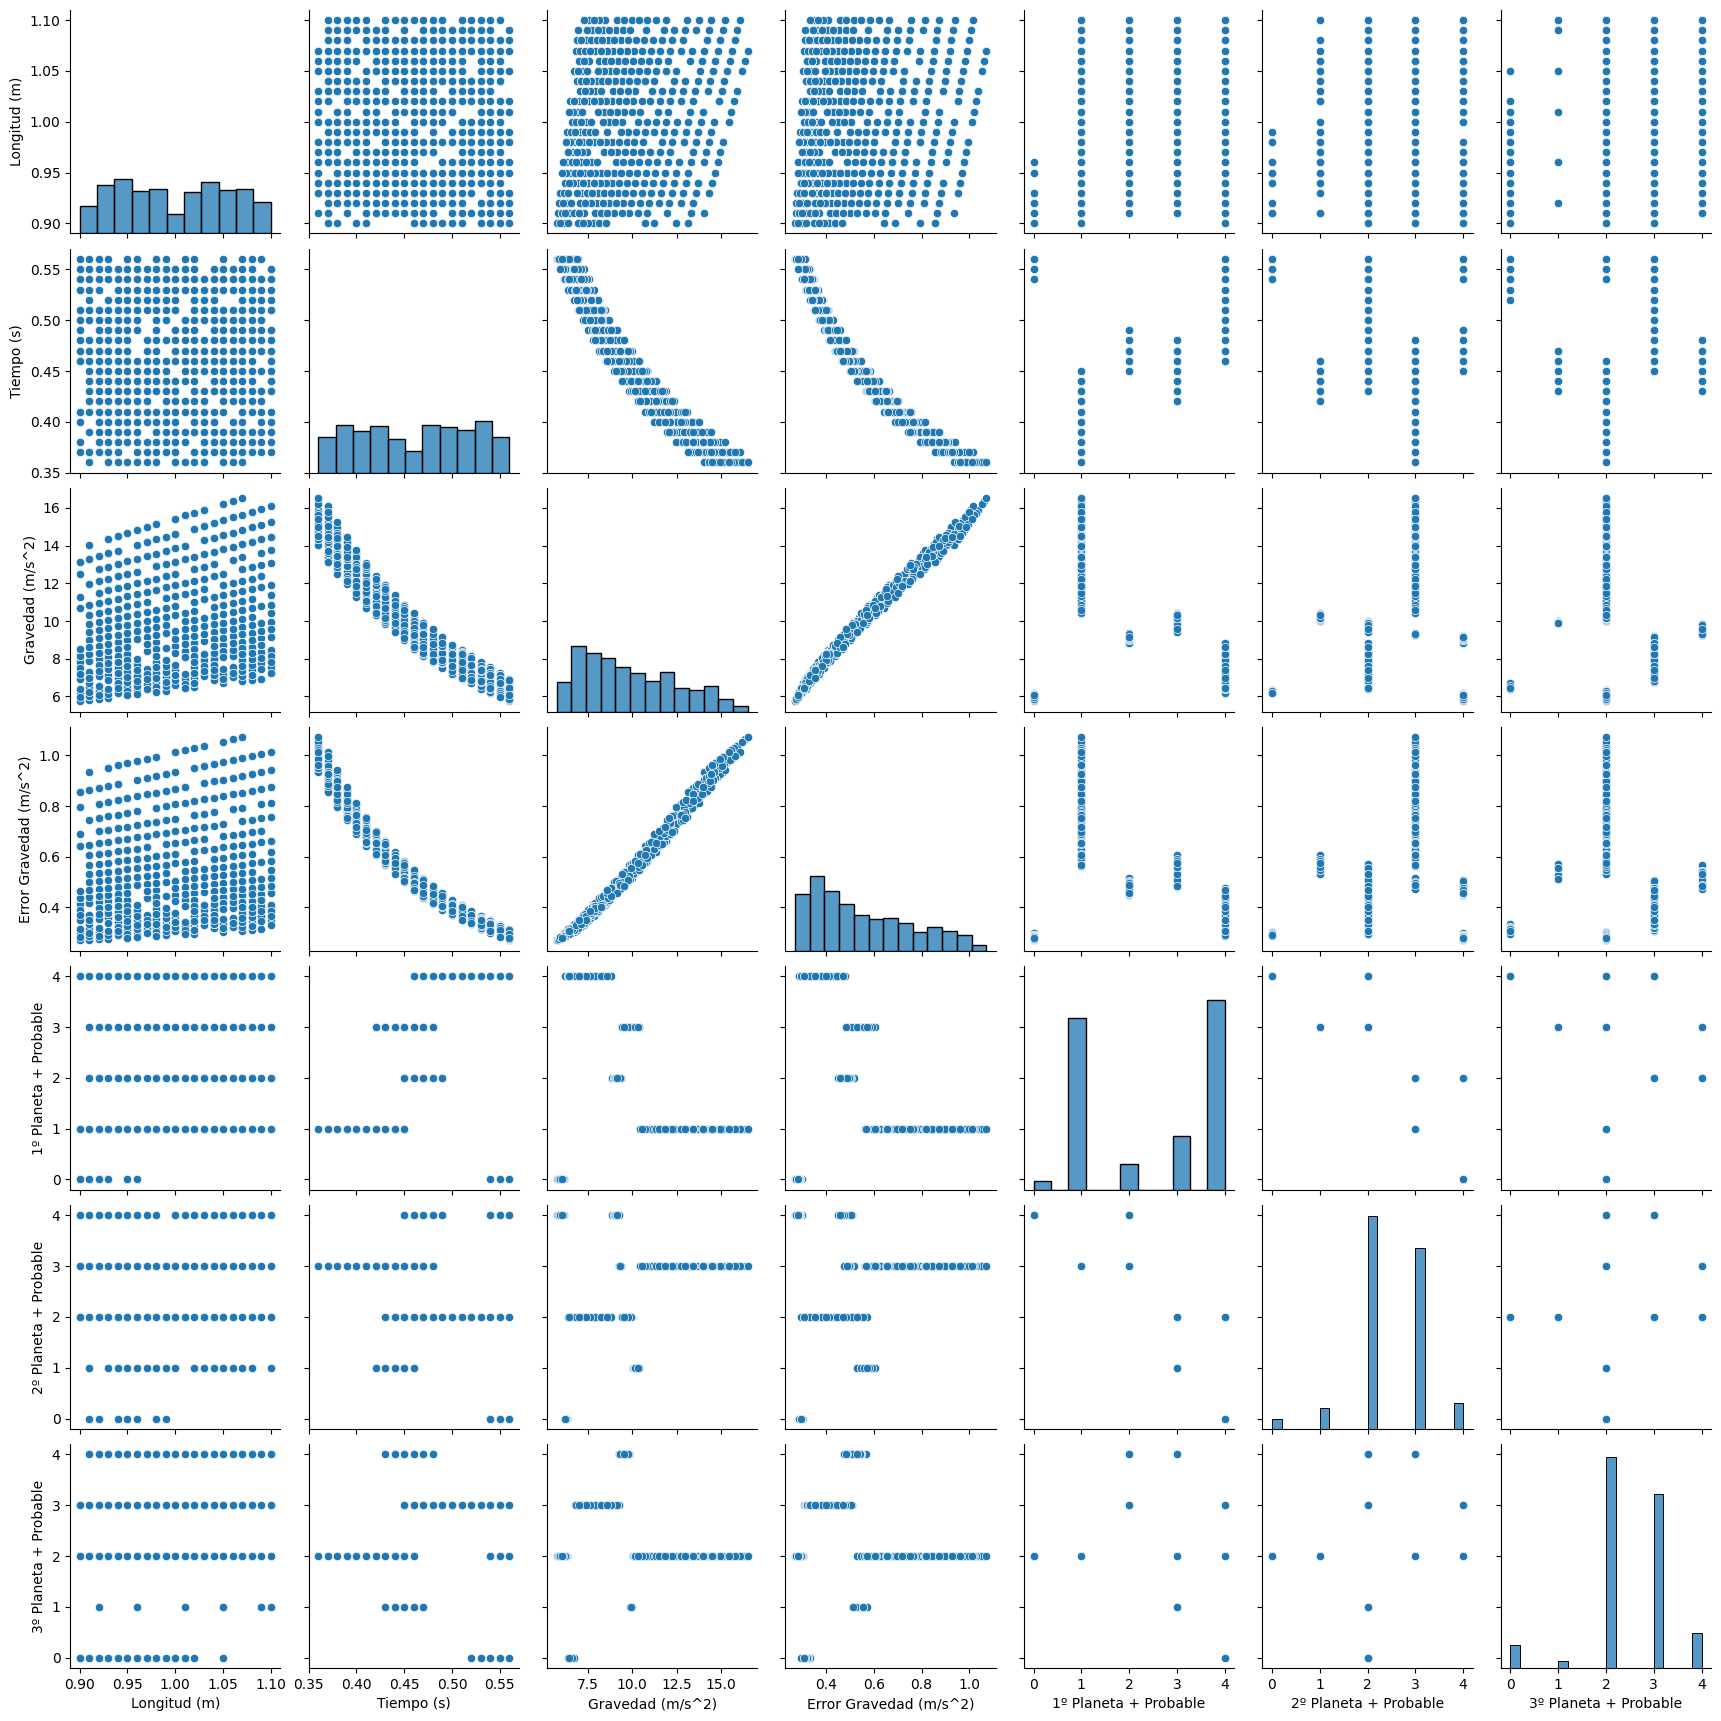

In [183]:


sns.pairplot(df_experimentos_filt)


# **Mapa correlación**

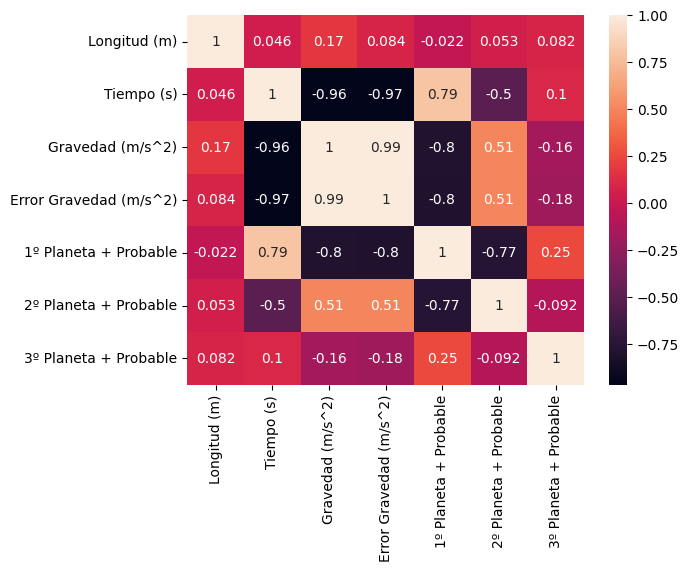

In [27]:

df_numeric = df_experimentos_filt.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()




# **Histograma de las variables**

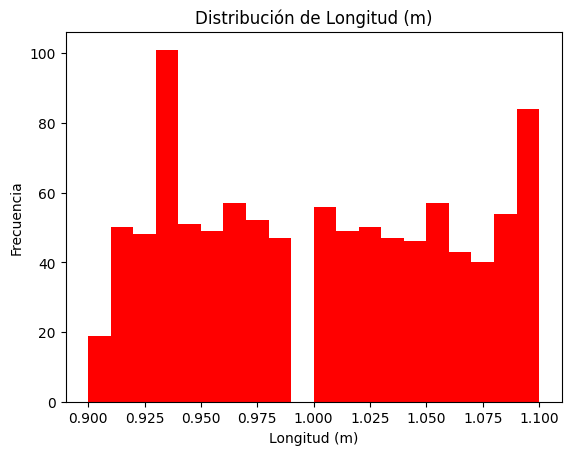

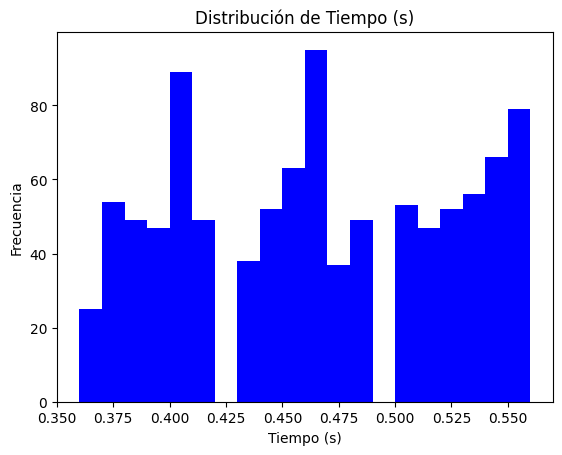

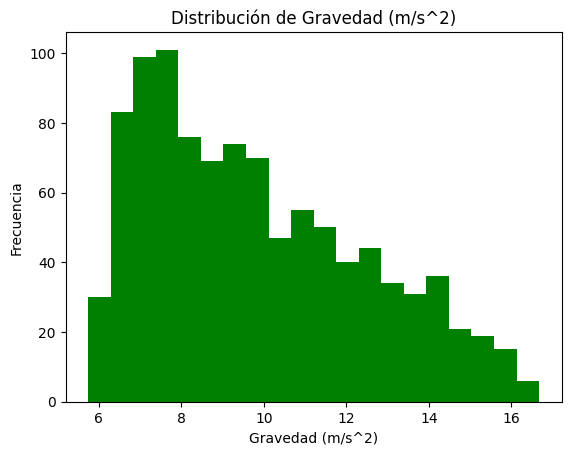

In [20]:
# Longitud 
plt.hist(df_experimentos['Longitud (m)'], bins=20, color='red')
plt.title('Distribución de Longitud (m)')
plt.xlabel('Longitud (m)')
plt.ylabel('Frecuencia')
plt.show()

#  Tiempo 
plt.hist(df_experimentos['Tiempo (s)'], bins=20, color='blue')
plt.title('Distribución de Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia')
plt.show()

#  Gravedad 
plt.hist(df_experimentos['Gravedad (m/s^2)'], bins=20, color='green')
plt.title('Distribución de Gravedad (m/s^2)')
plt.xlabel('Gravedad (m/s^2)')
plt.ylabel('Frecuencia')
plt.show()